Saving Coffe_sales.csv to Coffe_sales (2).csv
Primeras 5 filas del dataset:
   hour_of_day cash_type  money    coffee_name Time_of_Day Weekday Month_name  \
0           10      card   38.7          Latte     Morning     Fri        Mar   
1           12      card   38.7  Hot Chocolate   Afternoon     Fri        Mar   
2           12      card   38.7  Hot Chocolate   Afternoon     Fri        Mar   
3           13      card   28.9      Americano   Afternoon     Fri        Mar   
4           13      card   38.7          Latte   Afternoon     Fri        Mar   

   Weekdaysort  Monthsort        Date             Time  
0            5          3  2024-03-01  10:15:50.520000  
1            5          3  2024-03-01  12:19:22.539000  
2            5          3  2024-03-01  12:20:18.089000  
3            5          3  2024-03-01  13:46:33.006000  
4            5          3  2024-03-01  13:48:14.626000  

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entrie

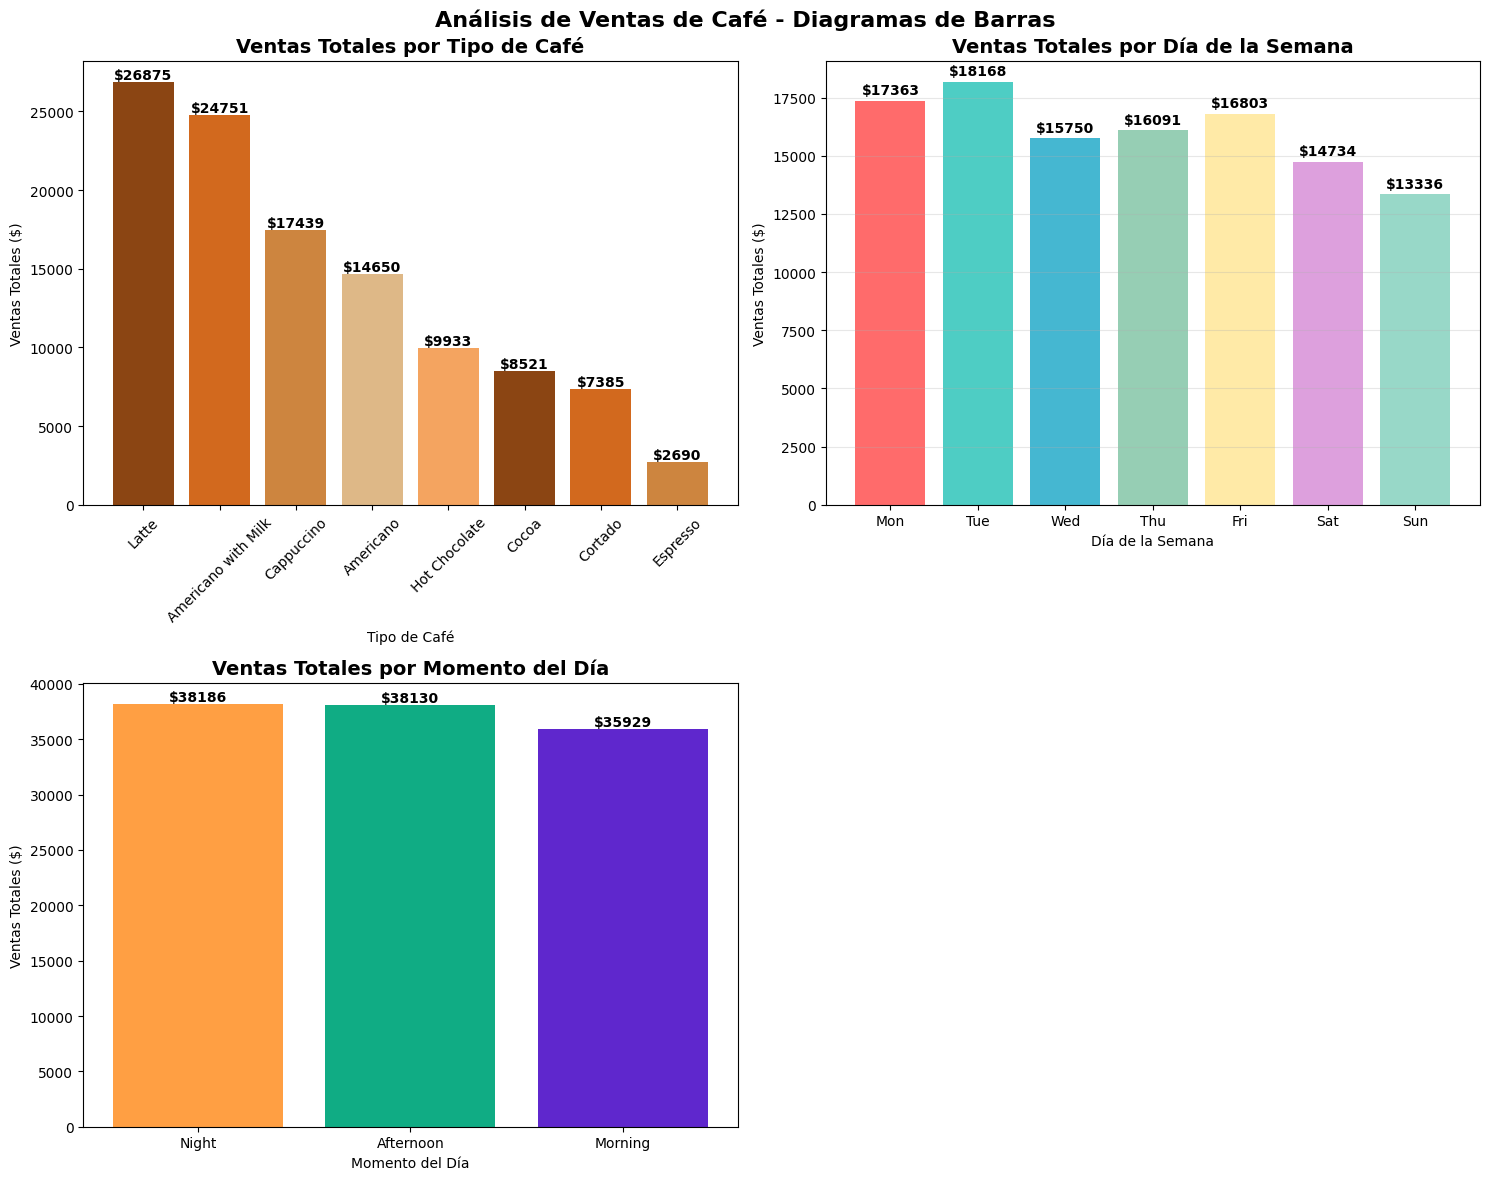


RESUMEN ESTADÍSTICO DE VENTAS

1. VENTAS POR TIPO DE CAFÉ:
   • Latte: $26,875.30
   • Americano with Milk: $24,751.12
   • Cappuccino: $17,439.14
   • Americano: $14,650.26
   • Hot Chocolate: $9,933.46
   • Cocoa: $8,521.16
   • Cortado: $7,384.86
   • Espresso: $2,690.28

2. VENTAS POR DÍA DE LA SEMANA:
   • Mon: $17,363.10
   • Tue: $18,168.38
   • Wed: $15,750.46
   • Thu: $16,091.40
   • Fri: $16,802.66
   • Sat: $14,733.52
   • Sun: $13,336.06

3. VENTAS POR MOMENTO DEL DÍA:
   • Night: $38,186.34
   • Afternoon: $38,130.04
   • Morning: $35,929.20

VENTAS TOTALES: $112,245.58
VENTA PROMEDIO: $31.65
NÚMERO TOTAL DE TRANSACCIONES: 3,547


In [3]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Subir archivo desde tu PC (te pedirá seleccionarlo)
uploaded = files.upload()

# Luego lo cargas en un DataFrame
df = pd.read_csv("Coffe_sales.csv")  # ajusta el nombre exacto

# Ver primeras filas
print("Primeras 5 filas del dataset:")
print(df.head())

# Ver información general
print("\nInformación general del dataset:")
print(df.info())

# Configurar el estilo de los gráficos
plt.style.use('default')
sns.set_palette("husl")

# Crear una figura con 3 subplots para los diagramas de barras
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Análisis de Ventas de Café - Diagramas de Barras', fontsize=16, fontweight='bold')

# DIAGRAMA 1: Ventas por Tipo de Café
coffee_sales = df.groupby('coffee_name')['money'].sum().sort_values(ascending=False)
ax1 = axes[0, 0]
bars1 = ax1.bar(coffee_sales.index, coffee_sales.values, color=['#8B4513', '#D2691E', '#CD853F', '#DEB887', '#F4A460'])
ax1.set_title('Ventas Totales por Tipo de Café', fontsize=14, fontweight='bold')
ax1.set_xlabel('Tipo de Café')
ax1.set_ylabel('Ventas Totales ($)')
ax1.tick_params(axis='x', rotation=45)

# Añadir valores en las barras
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:.0f}',
             ha='center', va='bottom', fontweight='bold')

# DIAGRAMA 2: Ventas por Día de la Semana
# Usar el campo Weekdaysort para ordenar correctamente los días
weekday_sales = df.groupby(['Weekdaysort', 'Weekday'])['money'].sum().reset_index()
weekday_sales = weekday_sales.sort_values('Weekdaysort')

# Usar nombres más cortos para mejor visualización
day_names = []
for day in weekday_sales['Weekday']:
    if 'Monday' in day: day_names.append('Lun')
    elif 'Tuesday' in day: day_names.append('Mar')
    elif 'Wednesday' in day: day_names.append('Mié')
    elif 'Thursday' in day: day_names.append('Jue')
    elif 'Friday' in day: day_names.append('Vie')
    elif 'Saturday' in day: day_names.append('Sáb')
    elif 'Sunday' in day: day_names.append('Dom')
    else: day_names.append(day[:3])

ax2 = axes[0, 1]
bars2 = ax2.bar(day_names, weekday_sales['money'],
                color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD', '#98D8C8'])
ax2.set_title('Ventas Totales por Día de la Semana', fontsize=14, fontweight='bold')
ax2.set_xlabel('Día de la Semana')
ax2.set_ylabel('Ventas Totales ($)')
ax2.grid(True, alpha=0.3, axis='y')

# Añadir valores en las barras
for i, bar in enumerate(bars2):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
             f'${height:.0f}',
             ha='center', va='bottom', fontweight='bold', fontsize=10)

# DIAGRAMA 3: Ventas por Momento del Día
time_sales = df.groupby('Time_of_Day')['money'].sum().sort_values(ascending=False)
ax3 = axes[1, 0]
bars3 = ax3.bar(time_sales.index, time_sales.values,
                color=['#FF9F43', '#10AC84', '#5F27CD', '#00D2D3'])
ax3.set_title('Ventas Totales por Momento del Día', fontsize=14, fontweight='bold')
ax3.set_xlabel('Momento del Día')
ax3.set_ylabel('Ventas Totales ($)')

# Añadir valores en las barras
for bar in bars3:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:.0f}',
             ha='center', va='bottom', fontweight='bold')

# Remover el cuarto subplot que no necesitamos
fig.delaxes(axes[1, 1])

# Ajustar el layout
plt.tight_layout()
plt.show()

# ESTADÍSTICAS ADICIONALES
print("\n" + "="*50)
print("RESUMEN ESTADÍSTICO DE VENTAS")
print("="*50)

print(f"\n1. VENTAS POR TIPO DE CAFÉ:")
for coffee, sales in coffee_sales.items():
    print(f"   • {coffee}: ${sales:,.2f}")

print(f"\n2. VENTAS POR DÍA DE LA SEMANA:")
for i, row in weekday_sales.iterrows():
    day_name = row['Weekday']
    sales = row['money']
    print(f"   • {day_name}: ${sales:,.2f}")

print(f"\n3. VENTAS POR MOMENTO DEL DÍA:")
for time, sales in time_sales.items():
    print(f"   • {time}: ${sales:,.2f}")

print(f"\nVENTAS TOTALES: ${df['money'].sum():,.2f}")
print(f"VENTA PROMEDIO: ${df['money'].mean():.2f}")
print(f"NÚMERO TOTAL DE TRANSACCIONES: {len(df):,}")